# **Importing necessary pacakges**

In [1]:
import numpy

import PIL.Image as Image
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img, img_to_array

In [2]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 26.9 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


# **Loading the dataset fro Google Drive**

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
train_path = '/content/gdrive/MyDrive/birdWatchfinal/train'
test_path = '/content/gdrive/MyDrive/birdWatchfinal/test'

Mounted at /content/gdrive


# **Data preprocessing and augmentation**

In [4]:
image_size = (224,224)
batch_size = 10

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=45,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   validation_split=0.2,
                                  )

validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2,)
test_datagen = ImageDataGenerator(rescale=1./255, )

train_batches = train_datagen.flow_from_directory(
    train_path,
    target_size = image_size,
    batch_size = batch_size,
    color_mode='rgb',
    class_mode = 'categorical',
    shuffle = True,
    seed = 123,
    subset = 'training', )

validation_batches = validation_datagen.flow_from_directory(
    train_path,
    target_size = image_size,
    batch_size = batch_size,
    color_mode='rgb',
    class_mode = 'categorical',
    shuffle = True,
    seed = 123,
    subset = 'validation', )

test_batches = test_datagen.flow_from_directory(
    test_path,
    target_size = image_size,
    batch_size = batch_size,
    color_mode='rgb',
    class_mode = 'categorical',
    shuffle = False,
    seed = 123, )

Found 595 images belonging to 21 classes.
Found 148 images belonging to 21 classes.
Found 126 images belonging to 21 classes.


# **Importing TensorflowHub and building the model**

In [5]:
from keras import layers
import tensorflow_hub as hub

In [6]:
url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
classifier_model = url
base_model = hub.KerasLayer(classifier_model, input_shape=image_size+(3,), trainable=False)

num_of_birds = 21

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_of_birds, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 21)                10773     
                                                                 
Total params: 2,924,629
Trainable params: 666,645
Non-trainable params: 2,257,984
_________________________________________________________________


In [7]:
model.compile(optimizer=keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=["accuracy"],)

In [45]:
steps_per_epoch = len(train_batches) // batch_size;
#steps_per_epoch=steps_per_epoch, validation_data=validation_batches

history = model.fit_generator(train_batches, epochs=15, steps_per_epoch=steps_per_epoch, validation_data=validation_batches)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


6/6 [==============================] - 3s 612ms/step - loss: 0.1473 - accuracy: 0.9500 - val_loss: 0.2977 - val_accuracy: 0.8919
Epoch 2/15
6/6 [==============================] - 3s 598ms/step - loss: 0.2681 - accuracy: 0.9273 - val_loss: 0.3821 - val_accuracy: 0.8514
Epoch 3/15
6/6 [==============================] - 3s 591ms/step - loss: 0.3997 - accuracy: 0.8167 - val_loss: 0.2752 - val_accuracy: 0.9122
Epoch 4/15
6/6 [==============================] - 3s 586ms/step - loss: 0.1527 - accuracy: 0.9333 - val_loss: 0.6929 - val_accuracy: 0.8243
Epoch 5/15
6/6 [==============================] - 3s 616ms/step - loss: 0.2280 - accuracy: 0.8909 - val_loss: 0.3843 - val_accuracy: 0.8581
Epoch 6/15
6/6 [==============================] - 3s 620ms/step - loss: 0.1188 - accuracy: 0.9500 - val_loss: 0.3177 - val_accuracy: 0.8919
Epoch 7/15
6/6 [==============================] - 3s 608ms/step - loss: 0.0584 - accuracy: 1.0000 - val_loss: 0.2756 - val_accuracy: 0.9257
Epoch 8/15
6/6 [===============

In [46]:
model.evaluate(test_batches)

13/13 [==============================] - 1s 85ms/step - loss: 0.1632 - accuracy: 0.9603


[0.16316048800945282, 0.9603174328804016]

# **Plotting accuracy and loss curves**

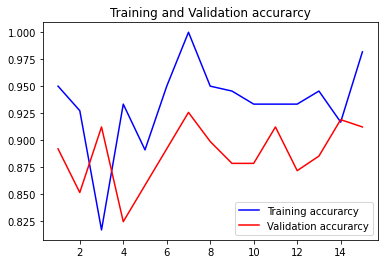

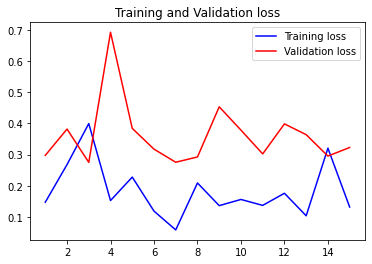

In [48]:
acc = history.history['accuracy']

val_acc = history.history['val_accuracy']

loss = history.history['loss']

val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)


#Train and validation accuracy

plt.plot(epochs, acc, 'b', label='Training accurarcy')

plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')

plt.title('Training and Validation accurarcy')

plt.legend()

plt.figure()


#Train and validation loss

plt.plot(epochs, loss, 'b', label='Training loss')

plt.plot(epochs, val_loss, 'r', label='Validation loss')

plt.title('Training and Validation loss')

plt.legend()

plt.show()

# **Running predictions on an image**

1/1 [==============================] - 1s 1s/step
Ceylon grey hornbill


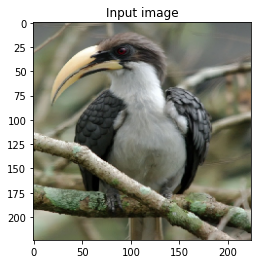

In [53]:
path = "/content/550px-Ceylon_grey_hornbill_4.jpg"
img = load_img(path, target_size=(224,224))
i = img_to_array(img)
i = i/255
input_arr = numpy.array([i])

pred = numpy.argmax(model.predict(input_arr))
if pred == 0:
  print("Ashy headed laughing thrush")
elif pred == 1:
  print("Black necked stork")
elif pred == 2:
  print("Blue eared kingfisher")
elif pred == 3:
  print("Blue rock pigeon")
elif pred == 4:
  print("Brown capped babbler")
elif pred == 5:
  print("Ceylon blue magpie")
elif pred == 6:
  print("Ceylon grey hornbill")
elif pred == 7:
  print("Ceylon hill myna")
elif pred == 8:
  print("Ceylon scimitar babbler")
elif pred == 9:
  print("Ceylon small barbet")
elif pred == 10:
  print("Ceylon swallow")
elif pred == 11:
  print("Ceylon white eye")
elif pred == 12:
  print("Indian courser")
elif pred == 13:
  print("Invalid image")
elif pred == 14:
  print("Jerdon's baza")
elif pred == 15:
  print("Jungle bush quail")
elif pred == 16:
  print("Painted francolin")
elif pred == 17:
  print("Saunders's tern")
elif pred == 18:
  print("Spot billed duck")
elif pred == 19:
  print("Yellow eared bulbul")
elif pred == 20:
  print("Yellow legged green pigeon")

plt.imshow(input_arr[0])
plt.title("Input image")
plt.show()


# **Performance metrics**

In [21]:
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report
import itertools

In [49]:
predictions = model.predict(test_batches, batch_size=10, verbose=0)

In [50]:
y_pred = numpy.rint(predictions)
y_true = test_batches.classes

rounded_labels=numpy.argmax(y_pred, axis=-1)
rounded_labels[1]

12

In [51]:
print(classification_report(y_true, rounded_labels))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         6
           4       1.00      0.83      0.91         6
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         6
          10       1.00      0.83      0.91         6
          11       1.00      0.83      0.91         6
          12       0.86      1.00      0.92         6
          13       0.75      1.00      0.86         6
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00         6
          16       1.00      1.00      1.00         6
          17       1.00    

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efb7e675150>)

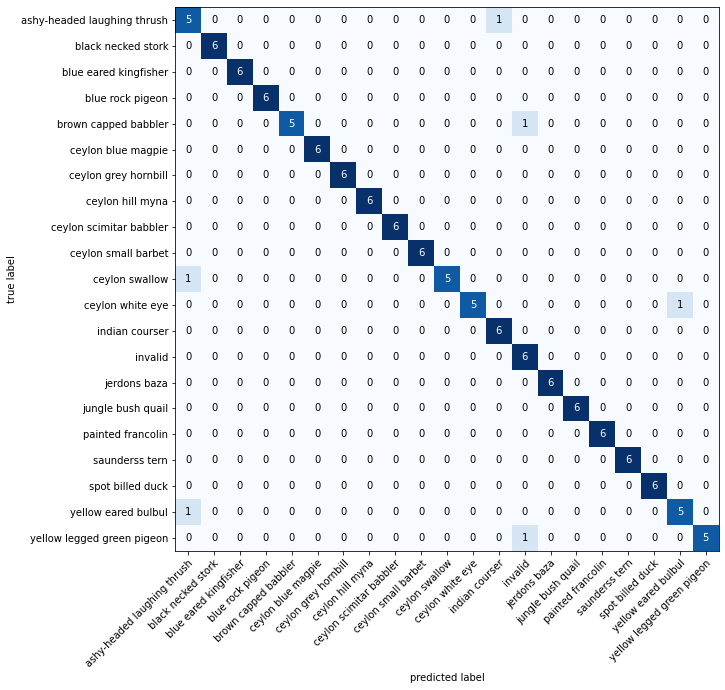

In [52]:
from mlxtend.plotting import plot_confusion_matrix
mat = confusion_matrix(y_true, rounded_labels)

class_names = ['ashy-headed laughing thrush','black necked stork','blue eared kingfisher','blue rock pigeon','brown capped babbler','ceylon blue magpie','ceylon grey hornbill','ceylon hill myna','ceylon scimitar babbler','ceylon small barbet', 'ceylon swallow','ceylon white eye', 'indian courser', 'invalid', 'jerdons baza','jungle bush quail', 'painted francolin', 'saunderss tern', 'spot billed duck','yellow eared bulbul', 'yellow legged green pigeon']

plot_confusion_matrix(conf_mat=mat, figsize=(10,10), class_names=class_names)


# **Converting TF model to tflite**

In [54]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("Finalmodel.tflite", 'wb') as f:
  f.write(tflite_model)
